# MEDICAL COST ANALYSIS

In this project, we will be trying to develop an end-to-end data science application using the
health insurance dataset.
The aim of the project is to estimate the approximate cost of a person's health insurance based on the given variables.

In [95]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# DATA IMPORTATION

In [3]:
# import dataset into dataframe
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# DATA WRANGLING

In [4]:
df.shape

(1338, 7)

The dataset has 1338 rows and 7 attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# check for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values.

In [7]:
# check for duplicates
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

In [9]:
#summarized mathematical description of the dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\AKINDILENI DAYO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


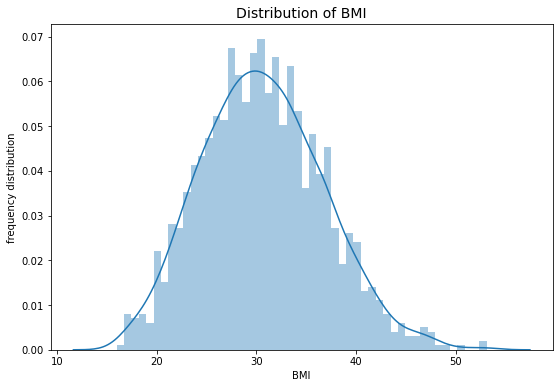

In [10]:
# using distplot to examine distribution of Bmi
plt.figure(figsize=(9,6))
sns.distplot(df["bmi"], bins=50)
plt.xlabel("BMI")
plt.ylabel("frequency distribution")
plt.title("Distribution of BMI", fontsize=14);

The distribution plot shows that the BMI column is well distributed and it forms a Gaussian curve.

In [11]:
def boxplot(x, y, title, data=df):
    """
    Function to plot a boxplot

    x: variable(1)
    y: variables(2)
    title: title for the boxplot
    data: dataframe
    """
    plt.figure(figsize=(10,7))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.show()

### Relationship between “smoker” and “charges”

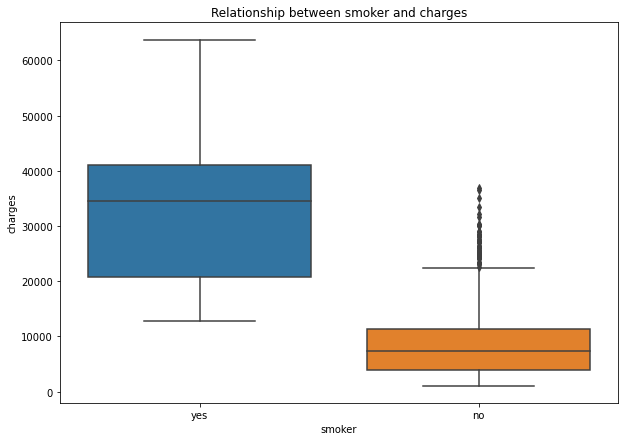

In [12]:
boxplot("smoker", "charges", "Relationship between smoker and charges")

This shows that people who smoke have higher charges than people who do not smoke.

In [13]:
df["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

### Relationship between “smoker” and “region”

In [14]:
df.region.groupby(df["smoker"]).value_counts(normalize=True)

smoker  region   
no      southeast    0.256820
        southwest    0.251176
        northwest    0.250235
        northeast    0.241769
yes     southeast    0.332117
        northeast    0.244526
        northwest    0.211679
        southwest    0.211679
Name: region, dtype: float64

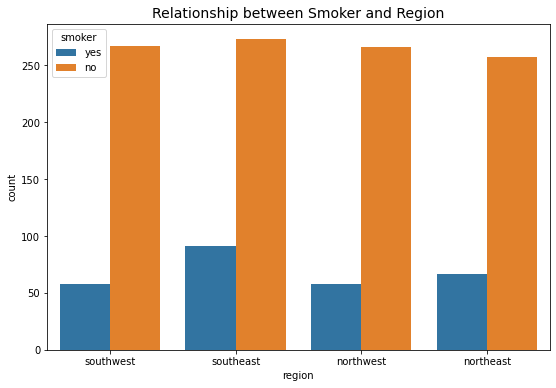

In [15]:
plt.figure(figsize=(9,6))
sns.countplot(data=df, x="region", hue="smoker")
plt.title("Relationship between Smoker and Region", fontsize=14)
plt.show()

This shows that the Southeast region has the highest number of smokers and also highest number of non smokers while northwest has the lowest number of non smokers. Both northwest and southwest has the lowest number of smokers.
Before concluding, there's need to check the distribution of the regions.

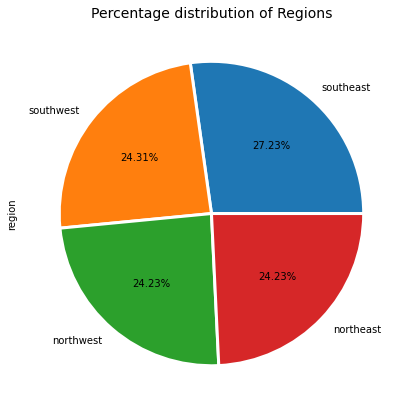

In [16]:
plt.figure(figsize=(10,7))
df.region.value_counts(normalize=True).plot(kind="pie",
                                            autopct="%.2f%%",
                                            wedgeprops={'linewidth':3.0, 'edgecolor':"white"},
                                            )
plt.title("Percentage distribution of Regions", fontsize=14);

The region column in the dataset is well distributed with no large difference. Hence, it can be concluded that the Southeast region has the highest number of smokers and also highest number of non smokers while northwest has the lowest number of non smokers. Both northwest and southwest has the lowest number of smokers.

### Relationship between “bmi” and “sex”

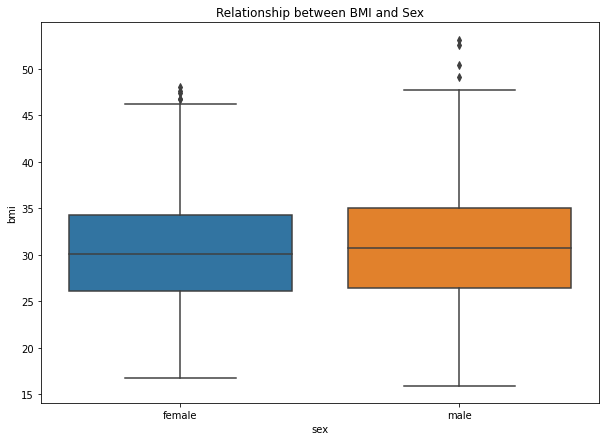

In [17]:
boxplot("sex", "bmi", "Relationship between BMI and Sex")

There is only a little difference between the average BMI of males and females. The males have a slight increase in their average BMI than that of the females.

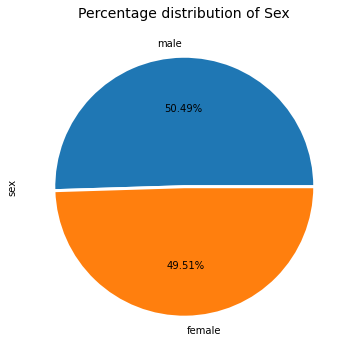

In [18]:
plt.figure(figsize=(9,6))
df.sex.value_counts(normalize=True).plot(kind="pie",
                                            autopct="%.2f%%",
                                            wedgeprops={'linewidth':3.0, 'edgecolor':"white"},
                                            )
plt.title("Percentage distribution of Sex", fontsize=14);

The pie chart shows that the ratio between the males and the females in the dataset is balanced.

### "Region" with the most "children".

In [19]:
df.children.groupby(df["region"]).sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

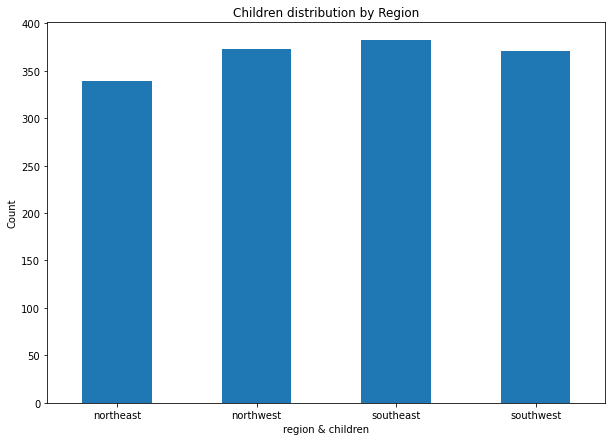

In [20]:
plt.figure(figsize=(10,7))
df.children.groupby(df["region"]).sum().plot.bar()
plt.title("Children distribution by Region")
plt.xlabel("region & children")
plt.ylabel("Count")
plt.xticks(rotation=0);

The region with the highest number of children is the SOUTHEAST

In [21]:
def scatterplot(x, y, title, data=df):
    """
    Function to plot a scatterplot

    x: variable(1)
    y: variables(2)
    title: title for the scatterplot
    data: dataframe
    """
    plt.figure(figsize=(9,6))
    plt.scatter(x=x, y=y, data=df)
    plt.title(title, fontsize=14)
    plt.xlabel(x)
    plt.ylabel(y);

###  Relationship between “age” and “bmi”

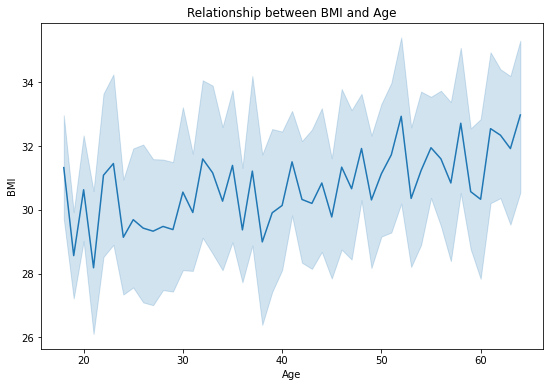

In [113]:
#plot a lineplot
plt.figure(figsize=(9,6))
sns.lineplot(data=df, x="age", y="bmi")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Relationship between BMI and Age");

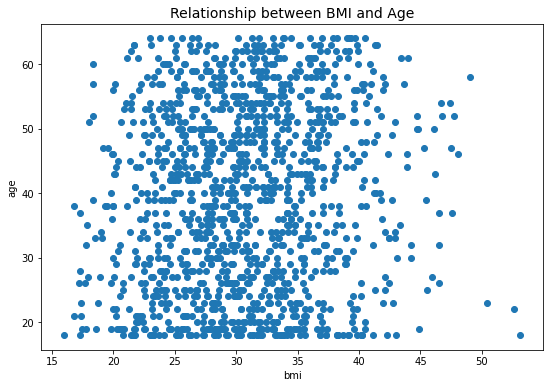

In [22]:
scatterplot("bmi", "age", "Relationship between BMI and Age")

In [23]:
df.bmi.corr(df["age"])

0.10934361041896883

The scatterplot shows NO correlation or relationship between age and BMI while the lineplot shows a slight increase in the average BMI index as age increases.

### Relationship between “bmi” and “children”

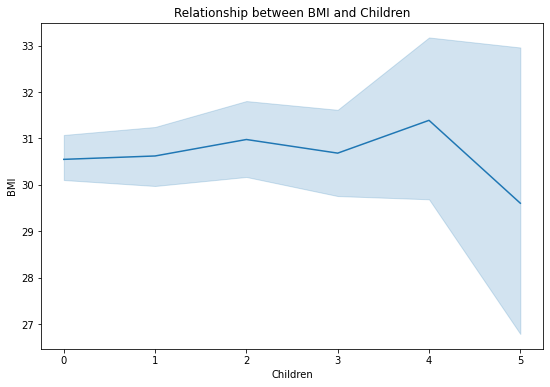

In [114]:
#plot a lineplot for BMI and children
plt.figure(figsize=(9,6))
sns.lineplot(data=df, x="children", y="bmi")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.title("Relationship between BMI and Children");

This shows that there is no relationship between number of children and BMI.

### Outlier in the "bmi" variable?

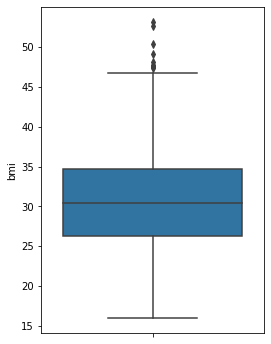

In [25]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df["bmi"]);

The boxplot shows that there are few outliers in th bmi column.

### Relationship between “bmi” and “charges”

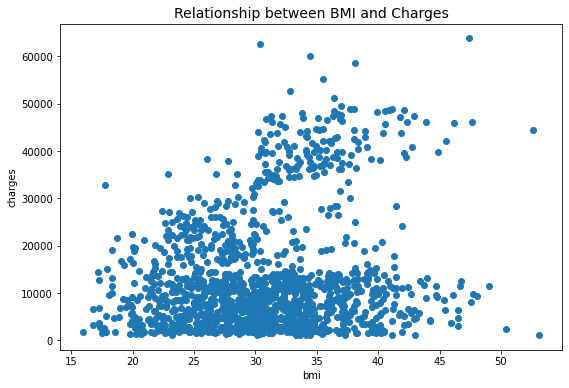

In [26]:
scatterplot("bmi", "charges", "Relationship between BMI and Charges")

In [27]:
df["bmi"].corr(df["charges"])

0.19840083122624938

BMI and charges are not linearly correlated.

### Relationship between “region”, “smoker” and “bmi”

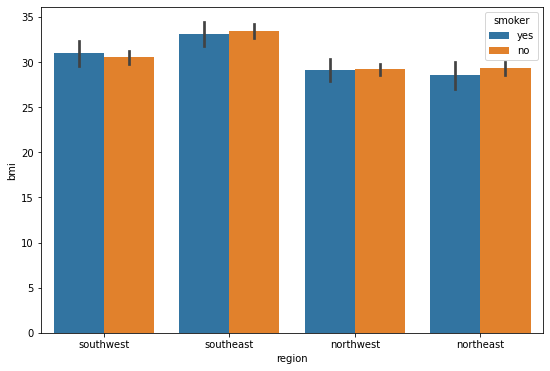

In [28]:
plt.figure(figsize=(9,6))
sns.barplot(x="region", y="bmi", data=df, hue="smoker");

From the barplot above, both smokers and non-smokers in the southeast region have the highest average BMI while both smokers and non-smokers in northwest alongside non-smokers in northeast have the lowest average BMI.

# DATA PREPROCESSING

In [29]:
#check for categorical columns
df.select_dtypes("object").nunique()

sex       2
smoker    2
region    4
dtype: int64

In [44]:
#instatiate LabelEncoder and trabsform categorical data
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

In [45]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523


### Train Test Split

In [46]:
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (1069, 6)
X_test: (268, 6)
y_train: (1069,)
y_test: (268,)


### Data Normalization

In [47]:
#instatiate the MinMaxScaler and transform the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [48]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=[X_train.columns])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=[X_test.columns])

In [49]:
X_train_scaled.head(1)

,age,sex,bmi,children,smoker,region
0,0.108696,1.0,0.230024,0.0,0.0,0.0


In [80]:
X_test_scaled.head(1)

,age,sex,bmi,children,smoker,region
0,0.673913,1.0,0.182371,0.0,0.0,0.0


# MODEL SELECTION

We will be trying different regression algorithmns and their performances examined to find the algorithm with the best performance.

In [69]:
#Model building and cross validation on the oversampled data

#Creating a list to store all the models
models = [["Linear regression", LinearRegression()],
          ["Random forest", RandomForestRegressor(random_state=1)],
          ["Gradient boost", GradientBoostingRegressor(random_state=1)],
          ["Xgboost", XGBRegressor(random_state=1)],
          ["dtree", DecisionTreeRegressor(random_state=1)],
          ["Adaboost", AdaBoostRegressor(random_state=1)],
           ["Bagging", BaggingRegressor(random_state=1)],
            ["Extra tree", ExtraTreesRegressor(random_state=1)]
           ]

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score

for name, model in models:
    cv_result = cross_val_score(estimator=model, X=X_train_scaled, y=y_train, cv=5, scoring="neg_mean_absolute_error")
    cv_result = -1 * cv_result.mean()
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result))

Linear regression: 4203.914037275289
Random forest: 2773.1042530780833
Gradient boost: 2619.410885655757
Xgboost: 3110.2667023619038
dtree: 3272.658526894125
Adaboost: 4026.137414816868
Bagging: 2875.4823818386076
Extra tree: 2770.700359143548


From the computation above, Gradient boost has the lowest mean absolute error, hence we will be proceding to optimizing this model.

# HYPER-PARAMETER OPTIMIZATION

In [79]:
# Parameter grid to pass in GridsearchCV
params = {"n_estimators": range(40, 150, 20),
          "learning_rate": [0.05, 0.2, 0.3, 0.5, 1],
          "subsample": [0.5,0.6,0.7,0.8,0.9],
          "max_features": range(1,5),
        "min_samples_split": range(5,25,5),
         "max_depth": range(2, 12, 2)}

#Calling GridSearchCV
grid = GridSearchCV(GradientBoostingRegressor(),
                    param_grid=params,
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

#Fitting parameters in GridSearchCV
grid.fit(X_train_scaled, y_train)

print("Best parameters are {} with CV score={}:" .format(grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits
Best parameters are {'learning_rate': 0.05, 'max_depth': 2, 'max_features': 4, 'min_samples_split': 10, 'n_estimators': 120, 'subsample': 0.6} with CV score=0.8442992388236797:


# MODEL EVALUATION

In [87]:
#predicting the test data with the best parameters from the gridsearch
y_pred = grid.predict(X_test_scaled)

In [89]:
#print the error metrics for our test data
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean absolute error: 2829.7727628584366
Mean squared error: 21601181.02311211
Root mean squared error: 4647.70707156896


### Feature Importance Selection

In [105]:
features = X_train_scaled.columns
importances = grid.best_estimator_.feature_importances_

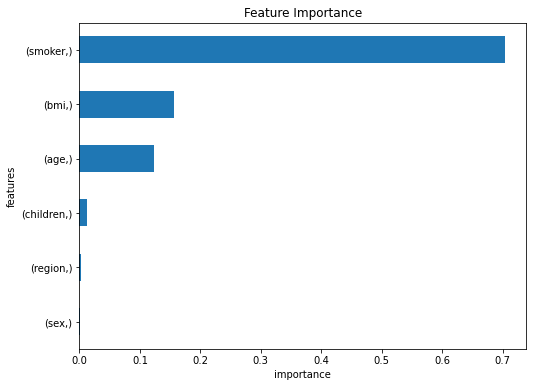

In [111]:
feat_imp = pd.Series(importances, index = features).sort_values()

plt.figure(figsize=(8,6))
feat_imp.plot(kind="barh")
plt.title("Feature Importance")
plt.xlabel("importance")
plt.ylabel("features");

This graph shows that the "smoker" column carries the highest weight while the sex column carries no weight at all in the model.